In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_10x_Spleen

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P4_7_AAACCTGAGAAGGACA,B cell,CL:0000236,B cell,1.0,Quake_10x_Spleen,3-M-8,B cell,M,Spleen,Mus musculus,10X_P4_7,10x,
10X_P4_7_AAACCTGAGCTAAGAT,natural killer cell,CL:0000623,natural killer cell,10.0,Quake_10x_Spleen,3-M-8,natural killer cell,M,Spleen,Mus musculus,10X_P4_7,10x,
10X_P4_7_AAACCTGCAACAACCT,B cell,CL:0000236,B cell,1.0,Quake_10x_Spleen,3-M-8,B cell,M,Spleen,Mus musculus,10X_P4_7,10x,
10X_P4_7_AAACCTGCAGCCAATT,B cell,CL:0000236,B cell,1.0,Quake_10x_Spleen,3-M-8,B cell,M,Spleen,Mus musculus,10X_P4_7,10x,
10X_P4_7_AAACCTGCAGCTCCGA,B cell,CL:0000236,B cell,1.0,Quake_10x_Spleen,3-M-8,B cell,M,Spleen,Mus musculus,10X_P4_7,10x,


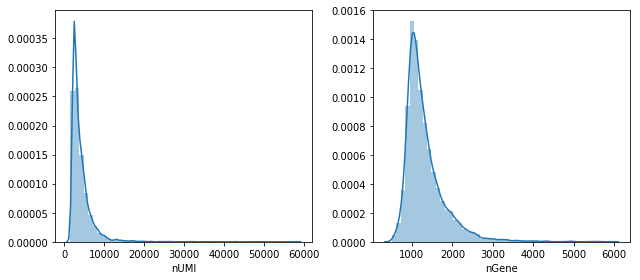

In [2]:
quake_10x_spleen = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Spleen/data.h5")
utils.peek(quake_10x_spleen, "Quake_10x_Spleen")
quake_10x_spleen = quake_10x_spleen.normalize()
quake_10x_spleen.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_spleen_model = cb.directi.fit_DIRECTi(
    quake_10x_spleen, quake_10x_spleen.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Spleen/model_0"
)
quake_10x_spleen.latent = quake_10x_spleen_model.inference(quake_10x_spleen)

[DIRECTi epoch 0] train=2.793, val=2.786, time elapsed=2.5s Regular save...
[DIRECTi epoch 1] train=2.709, val=2.466, time elapsed=0.8s
[DIRECTi epoch 2] train=1.214, val=1.011, time elapsed=0.9s
[DIRECTi epoch 3] train=0.922, val=0.931, time elapsed=0.9s
[DIRECTi epoch 4] train=0.900, val=0.912, time elapsed=0.8s
[DIRECTi epoch 5] train=0.864, val=0.965, time elapsed=0.9s
[DIRECTi epoch 6] train=0.858, val=0.971, time elapsed=0.9s
[DIRECTi epoch 7] train=0.853, val=0.935, time elapsed=1.1s
[DIRECTi epoch 8] train=0.849, val=0.910, time elapsed=1.2s
[DIRECTi epoch 9] train=0.844, val=0.887, time elapsed=1.0s
[DIRECTi epoch 10] train=0.837, val=0.951, time elapsed=0.9s Regular save...
[DIRECTi epoch 11] train=0.829, val=0.913, time elapsed=0.9s
[DIRECTi epoch 12] train=0.825, val=0.914, time elapsed=0.9s
[DIRECTi epoch 13] train=0.822, val=0.845, time elapsed=0.9s
[DIRECTi epoch 14] train=0.819, val=0.834, time elapsed=0.9s
[DIRECTi epoch 15] train=0.816, val=0.836, time elapsed=0.9s
[D

[  Info   ] Computing tSNE...


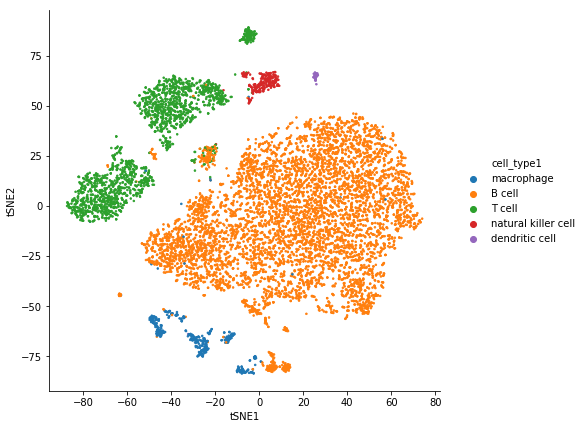

In [4]:
plot = quake_10x_spleen.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Spleen/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


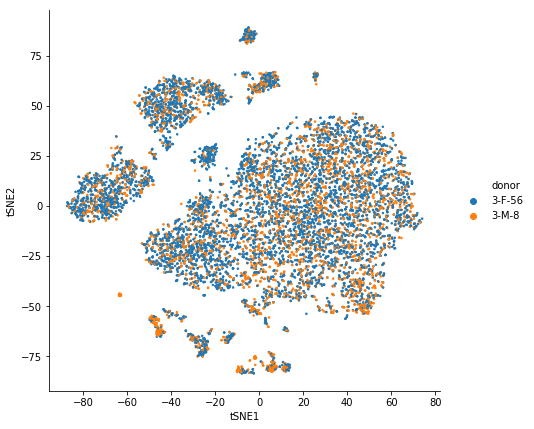

In [5]:
plot = quake_10x_spleen.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Spleen/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


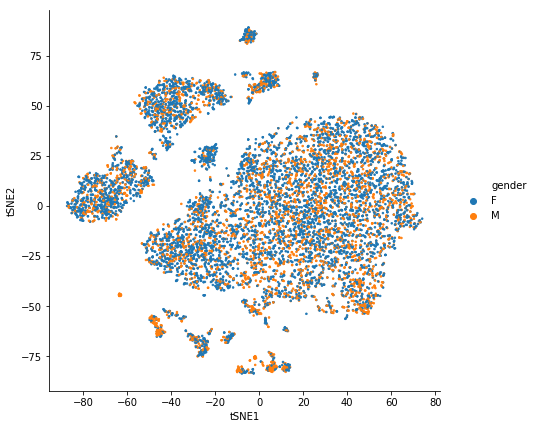

In [6]:
plot = quake_10x_spleen.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Spleen/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_10x_spleen_models = [quake_10x_spleen_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_spleen_models.append(cb.directi.fit_DIRECTi(
        quake_10x_spleen, quake_10x_spleen.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Spleen/model_%d" % i
    ))
quake_10x_spleen_blast = cb.blast.BLAST(quake_10x_spleen_models, quake_10x_spleen, 
                                               keep_exprs=True).build_empirical()
quake_10x_spleen_blast.save("Quake_10x_Spleen")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Spleen/model_1/checkpoint-125
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Spleen/model_2/checkpoint-108
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Spleen/model_3/checkpoint-126


In [8]:
with open("Quake_10x_Spleen/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Spleen/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_10x_spleen_blast, "Quake_10x_Spleen")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9633
Accuracy = 0.9954


### Quake_Smart-seq2_Spleen

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A21.MAA000508.3_9_M.1.1,T cell,CL:0000084,T cell,MAA000508,1.0,Quake_Smart-seq2_Spleen,3_9_M,,M,Spleen,Mus musculus,Smart-seq2,
C6.MAA000508.3_9_M.1.1,B cell,CL:0000236,B cell,MAA000508,2.0,Quake_Smart-seq2_Spleen,3_9_M,,M,Spleen,Mus musculus,Smart-seq2,
A22.MAA000508.3_9_M.1.1,T cell,CL:0000084,T cell,MAA000508,1.0,Quake_Smart-seq2_Spleen,3_9_M,,M,Spleen,Mus musculus,Smart-seq2,
C8.MAA000508.3_9_M.1.1,B cell,CL:0000236,B cell,MAA000508,2.0,Quake_Smart-seq2_Spleen,3_9_M,,M,Spleen,Mus musculus,Smart-seq2,
E8.MAA000508.3_9_M.1.1,B cell,CL:0000236,B cell,MAA000508,2.0,Quake_Smart-seq2_Spleen,3_9_M,,M,Spleen,Mus musculus,Smart-seq2,


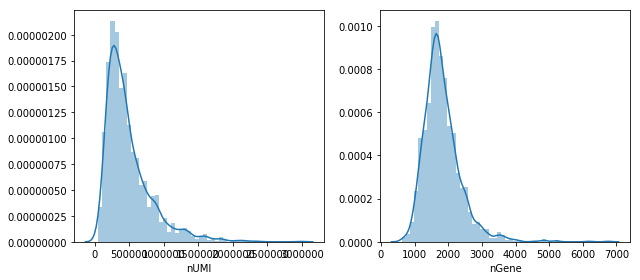

In [10]:
quake_smart_seq2_spleen = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Spleen/data.h5")
utils.peek(quake_smart_seq2_spleen, "Quake_Smart-seq2_Spleen")
quake_smart_seq2_spleen = quake_smart_seq2_spleen.normalize()
quake_smart_seq2_spleen.obs.head()

In [11]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_spleen_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_spleen, quake_smart_seq2_spleen.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Spleen/model_0"
)
quake_smart_seq2_spleen.latent = quake_smart_seq2_spleen_model.inference(quake_smart_seq2_spleen)

[DIRECTi epoch 0] train=2.808, val=3.060, time elapsed=1.5s Regular save...
[DIRECTi epoch 1] train=2.802, val=3.051, time elapsed=0.1s
[DIRECTi epoch 2] train=2.790, val=3.040, time elapsed=0.2s
[DIRECTi epoch 3] train=2.781, val=3.029, time elapsed=0.2s
[DIRECTi epoch 4] train=2.771, val=3.016, time elapsed=0.2s
[DIRECTi epoch 5] train=2.759, val=3.002, time elapsed=0.1s
[DIRECTi epoch 6] train=2.748, val=2.986, time elapsed=0.1s
[DIRECTi epoch 7] train=2.725, val=2.963, time elapsed=0.2s
[DIRECTi epoch 8] train=2.704, val=2.924, time elapsed=0.2s
[DIRECTi epoch 9] train=2.644, val=2.840, time elapsed=0.2s
[DIRECTi epoch 10] train=2.443, val=2.585, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=2.042, val=1.911, time elapsed=0.2s
[DIRECTi epoch 12] train=1.291, val=1.838, time elapsed=0.2s
[DIRECTi epoch 13] train=0.769, val=1.427, time elapsed=0.1s
[DIRECTi epoch 14] train=0.681, val=1.242, time elapsed=0.2s
[DIRECTi epoch 15] train=0.667, val=0.870, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


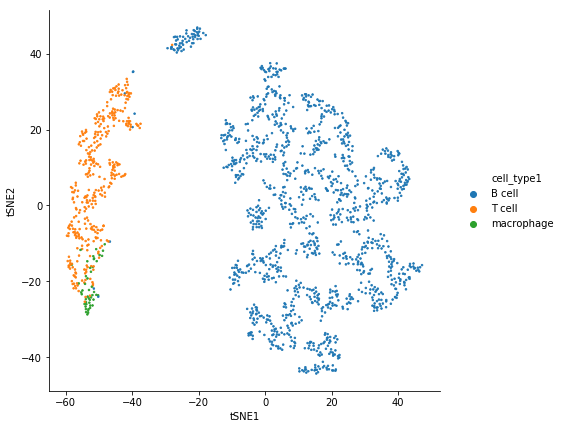

In [12]:
plot = quake_smart_seq2_spleen.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Spleen/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


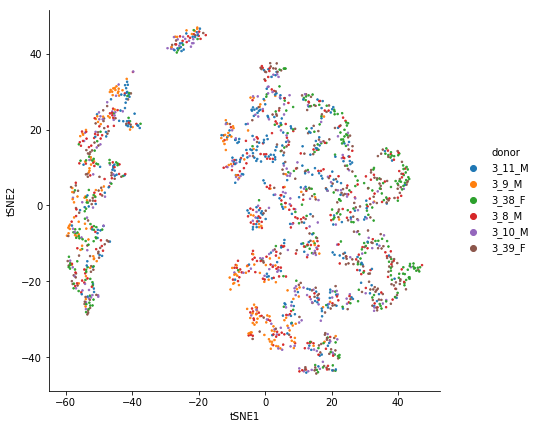

In [13]:
plot = quake_smart_seq2_spleen.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Spleen/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


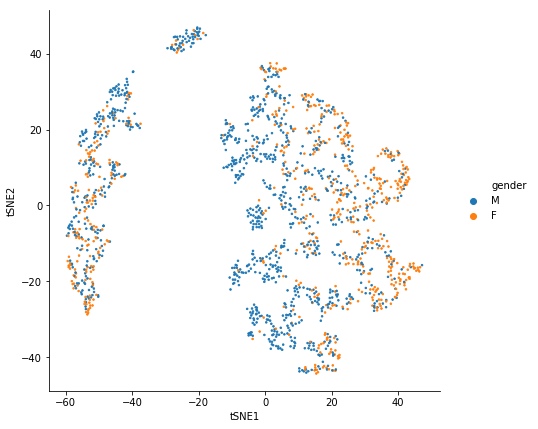

In [14]:
plot = quake_smart_seq2_spleen.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Spleen/gender.pdf", bbox_inches="tight")

In [15]:
%%capture capio
quake_smart_seq2_spleen_models = [quake_smart_seq2_spleen_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_spleen_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_spleen, quake_smart_seq2_spleen.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Spleen/model_%d" % i
    ))
quake_smart_seq2_spleen_blast = cb.blast.BLAST(quake_smart_seq2_spleen_models, quake_smart_seq2_spleen, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_spleen_blast.save("Quake_Smart-seq2_Spleen")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Spleen/model_1/checkpoint-193
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Spleen/model_2/checkpoint-184
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Spleen/model_3/checkpoint-123


In [16]:
with open("Quake_Smart-seq2_Spleen/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Spleen/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [17]:
utils.self_projection(quake_smart_seq2_spleen_blast, "Quake_Smart-seq2_Spleen")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9010
Accuracy = 0.9980


## Mouse aligned

In [18]:
if not os.path.exists("ALIGNED_Mus_musculus_Spleen"):
    os.makedirs("ALIGNED_Mus_musculus_Spleen")
#quake_smart_seq2_spleen.obs["quake_smart_seq2_spleen_donor"] = \
#    quake_smart_seq2_spleen.obs["donor"]
#quake_10x_spleen.obs["quake_10x_spleen_donor"] = \
#    quake_10x_spleen.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_spleen=quake_10x_spleen,
    quake_smart_seq2_spleen=quake_smart_seq2_spleen
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [19]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,latent_7,latent_8,latent_9,organ,organism,plate,platform,region,tSNE1,tSNE2
10X_P4_7_AAACCTGAGAAGGACA,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Spleen,3-M-8,B cell,M,-0.692948,...,0.534635,0.710142,-1.086084,Spleen,Mus musculus,10X_P4_7,10x,,8.994681,-10.341877
10X_P4_7_AAACCTGAGCTAAGAT,natural killer cell,CL:0000623,natural killer cell,NaN,10.0,Quake_10x_Spleen,3-M-8,natural killer cell,M,4.147678,...,-0.622932,0.278275,-0.495859,Spleen,Mus musculus,10X_P4_7,10x,,1.727768,63.691788
10X_P4_7_AAACCTGCAACAACCT,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Spleen,3-M-8,B cell,M,-1.024461,...,0.965595,0.868765,0.220394,Spleen,Mus musculus,10X_P4_7,10x,,56.597054,-21.373549
10X_P4_7_AAACCTGCAGCCAATT,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Spleen,3-M-8,B cell,M,0.275373,...,-0.462352,0.307719,-0.184505,Spleen,Mus musculus,10X_P4_7,10x,,2.519669,-36.344215
10X_P4_7_AAACCTGCAGCTCCGA,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Spleen,3-M-8,B cell,M,-1.180339,...,0.406753,0.317051,-0.214187,Spleen,Mus musculus,10X_P4_7,10x,,-8.129609,-33.600266


In [20]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.395, val=2.390, time elapsed=2.8s Regular save...
[DIRECTi epoch 1] train=2.044, val=1.082, time elapsed=1.3s
[DIRECTi epoch 2] train=0.730, val=0.828, time elapsed=1.3s
[DIRECTi epoch 3] train=0.705, val=0.782, time elapsed=1.2s
[DIRECTi epoch 4] train=0.689, val=0.862, time elapsed=1.2s
[DIRECTi epoch 5] train=0.660, val=0.673, time elapsed=1.3s
[DIRECTi epoch 6] train=0.652, val=0.667, time elapsed=1.3s
[DIRECTi epoch 7] train=0.646, val=0.658, time elapsed=1.3s
[DIRECTi epoch 8] train=0.641, val=0.672, time elapsed=1.3s
[DIRECTi epoch 9] train=0.637, val=0.657, time elapsed=1.3s
[DIRECTi epoch 10] train=0.634, val=0.651, time elapsed=1.3s Regular save...
[DIRECTi epoch 11] train=0.631, val=0.641, time elapsed=1.3s
[DIRECTi epoch 12] train=0.629, val=0.638, time elapsed=1.3s
[DIRECTi epoch 13] train=0.627, val=0.634, time elapsed=1.2s
[DIRECTi epoch 14] train=0.625, val=0.631, time elapsed=1.3s
[DIRECTi epoch 15] train=0.623, val=0.628, time elapsed=1.3s
[D

[  Info   ] Computing tSNE...


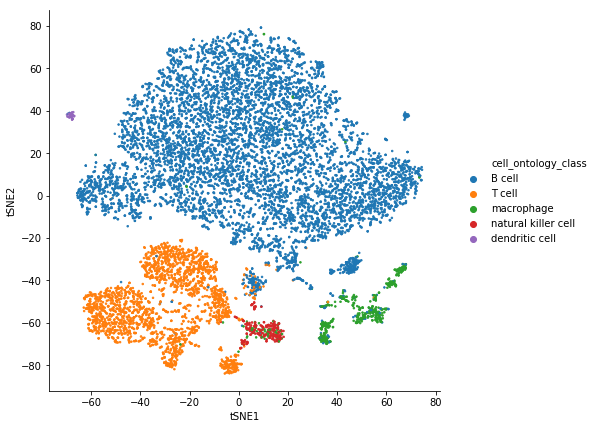

In [21]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


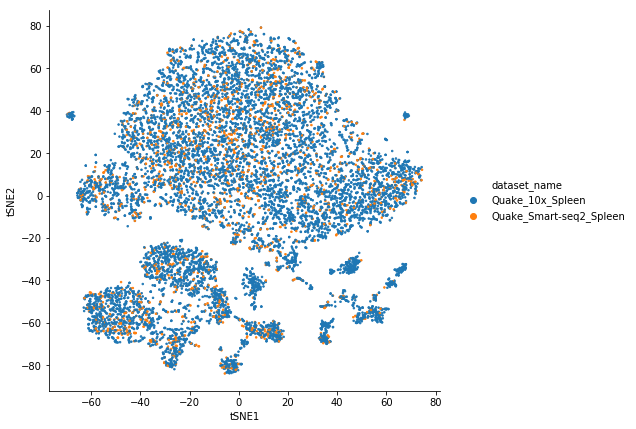

In [22]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


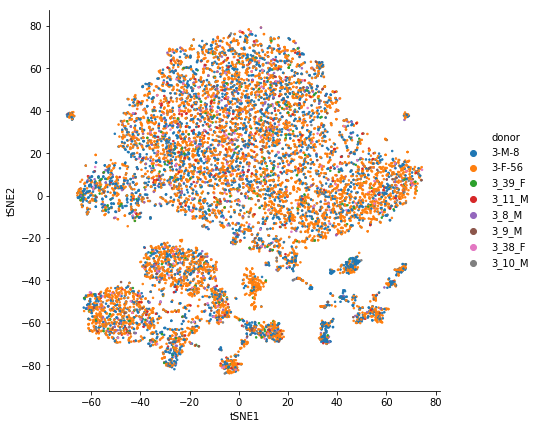

In [23]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


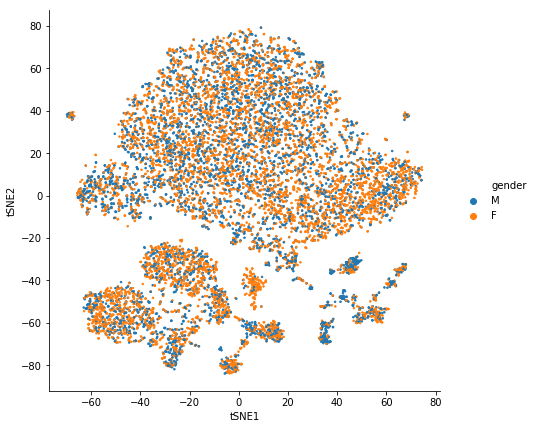

In [24]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Spleen/gender.pdf", bbox_inches="tight")

In [25]:
%%capture capio
mouse_models = [mouse_model]
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Spleen")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_1/checkpoint-85
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_2/checkpoint-72
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Spleen/model_3/checkpoint-81


In [26]:
with open("ALIGNED_Mus_musculus_Spleen/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Spleen/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Spleen")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9651
Accuracy = 0.9889
